# 1. 데이터 불러오기

In [1]:
import pandas as pd

secom_data = pd.read_csv('secom.data', sep = ' ',header = None)
data = secom_data.copy()
secom_labels = pd.read_csv('secom_labels.data', sep = ' ', header = None)
label = secom_labels.copy()
label = label.drop(1, axis = 1)

# 2. 데이터 전처리

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer

# 편차가 0인 변수를 제거
n = 589
for i in range(0, n+1):
    if data[i].std() == 0:
        data = data.drop([i], axis=1)

# 결측치가 너무 많은 변수 제거
data = data.dropna(axis = 1, thresh = 940)

# 정규화 작업
std_scaler = StandardScaler()
std_scaler.fit(data)
std = std_scaler.transform(data)
data = pd.DataFrame(std, columns = data.columns, index = list(data.index.values))

# KNN 알고리즘으로 결측치 대체
imputer = KNNImputer(n_neighbors=3)
imputed = imputer.fit_transform(data)
data = pd.DataFrame(imputed, columns=data.columns)

# 3. 특징 선택

In [3]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import KFold, GridSearchCV
import warnings
warnings.filterwarnings('ignore')

kf = KFold(n_splits=10)

params = {'C': [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]}
gscv_lsvc = LinearSVC(penalty="l1", dual=False)
gscv = GridSearchCV(gscv_lsvc, params, scoring='f1', cv=kf)
gscv.fit(data, label)

print('최적 하이퍼 파라미터: ', gscv.best_params_)
print('최고 F1-score: {:.6f}'.format(gscv.best_score_))

최적 하이퍼 파라미터:  {'C': 0.5}
최고 F1-score: 0.199781


In [4]:
from sklearn.feature_selection import SelectFromModel

lsvc = LinearSVC(C=0.3, penalty="l1", dual=False).fit(data, label)
sfm = SelectFromModel(lsvc, prefit=True)
data_selected = sfm.transform(data)

col = data.columns.values
data_selected_transpose = data_selected.T
features = []
for i in range(len(data_selected_transpose)):
    for n in range(len(col)):
        if list(data_selected_transpose[i]) == list(data[col[n]]):
            features.append(col[n])
            
df_selected = pd.DataFrame(data_selected, columns=features)
df_selected

0         1         2         6         9         11        14   \
0     0.223879  0.847825 -0.434320 -0.561266  1.127696 -1.514514 -0.375423   
1     1.105015 -0.382054  1.012583  0.197330  0.022567 -0.132774  0.411142   
2    -1.112023  0.797316 -0.479135 -0.902153  0.326974 -0.229174  0.182541   
3    -0.349640 -0.198431 -0.051316  0.500993 -0.764920 -0.116707  0.214554   
4     0.241679  0.087330  1.112384 -0.114865 -0.149489 -0.598710  0.558260   
...        ...       ...       ...       ...       ...       ...       ...   
1562 -1.563121 -0.391758 -0.705473 -3.025756 -0.242134 -0.518376  0.988600   
1563  0.514375  0.332161 -0.067131 -0.424045 -0.348015 -0.205074  0.056025   
1564 -0.484290 -1.443984  0.194982 -0.272759 -0.634775  0.453662  0.309808   
1565 -1.624128  0.449849 -0.796987 -0.371296 -0.420808  0.405462  0.261126   
1566 -0.944764 -0.560950 -0.172959 -2.567968  0.450501  0.512574  0.453087   

           17        20        21   ...       564       567       571  \
0    -0.285600 -0.146683  0.318204  ...  0.056351 -0.451517  0.034410   
1    -0.111450 -1.348004  0.282297  ...  0.847721  0.015683  1.205944   
2    -0.335357  0.433058  0.272323  ... -2.030333  5.988514 -0.263745   
3    -0.227550 -0.236334  0.239608  ...  0.332381  0.211113 -0.278290   
4     0.170507 -0.971470  0.226841  ... -0.936343  0.966369 -0.270290   
...        ...       ...       ...  ...       ...       ...       ...   
1562 -0.177793  0.128246  0.318603  ... -0.556486 -0.668322 -0.314650   
1563 -0.152914 -0.606891 -1.261297  ... -0.716026 -0.323266  0.289297   
1564  0.253436  1.227962  0.742303  ...  1.764444  1.111924  0.878700   
1565  0.211972 -1.091005  0.553194  ... -0.556486 -0.668322 -0.698253   
1566  0.471815 -0.015195  0.476992  ...  0.750225 -0.329373 -0.068126   

           576       577       582        584       586       587       589  
0    -0.229797 -0.135520  0.118661  -0.093178 -0.787188  0.309504  0.732103  
1    -0.263493 -0.460054  0.530034   0.444564 -0.959868  0.411722  1.156320  
2    -0.205046 -0.590505 -1.262377   0.014371  2.990196  3.625906 -0.179091  
3    -0.224950 -0.645708 -0.322096  -0.362049 -0.101862 -0.178870 -0.275158  
4    -0.230791 -0.454486 -5.905014  27.062785 -0.101862 -0.178870 -0.275158  
...        ...       ...       ...        ...       ...       ...       ...  
1562 -0.240947 -0.393931 -0.380863   0.014371 -1.186511 -0.303803  1.102704  
1563 -0.268684  0.095786 -0.762852  -0.066291 -1.186511 -0.303803  1.102704  
1564 -0.256565  0.086877 -0.410247   0.068145 -0.142334 -0.894395 -0.598187  
1565 -0.227906  0.205751  0.089277  -0.012516  0.383801  0.911454 -0.065798  
1566 -0.252776  0.502828 -0.410247   0.041258 -0.789886 -0.031222  0.406068  

[1567 rows x 213 columns]

# 4. 데이터 불균형 해소

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(df_selected, label, test_size = 0.2, random_state = 0)

In [6]:
# SMOTE를 활용한 Oversampling

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state = 0)
data_over, label_over = smote.fit_resample(X_train, Y_train)
label_over.value_counts()

-1    1162
 1    1162
dtype: int64

# 5. 데이터 분류

In [7]:
from sklearn.tree import DecisionTreeClassifier

params1 = {'min_samples_split': [2, 4, 8], 
           'min_samples_leaf': [3, 6, 9]}
gscv_dtc = DecisionTreeClassifier()
gscv = GridSearchCV(gscv_dtc, params1, scoring='f1', cv=kf)
gscv.fit(data, label)

print('최적 하이퍼 파라미터: ', gscv.best_params_)
print('최고 F1-score: {:.6f}'.format(gscv.best_score_))

최적 하이퍼 파라미터:  {'min_samples_leaf': 3, 'min_samples_split': 4}
최고 F1-score: 0.127439


In [8]:
DTC = DecisionTreeClassifier(random_state=0, 
                             min_samples_split=3, 
                             min_samples_leaf=2)
DTC.fit(data_over, label_over)

DecisionTreeClassifier(min_samples_leaf=2, min_samples_split=3, random_state=0)

# 6. 성능 평가

              precision    recall  f1-score   support

          -1       0.99      0.98      0.98      1463
           1       0.71      0.81      0.75       104

    accuracy                           0.96      1567
   macro avg       0.85      0.89      0.87      1567
weighted avg       0.97      0.96      0.97      1567



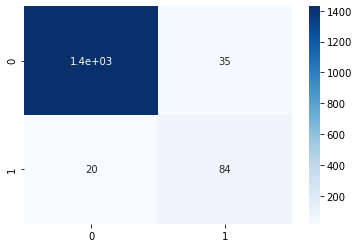

In [9]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

pred_data = DTC.predict(df_selected)

cm = pd.DataFrame(confusion_matrix(label, pred_data))
sns.heatmap(cm, annot=True, cmap='Blues')
print(classification_report(label, pred_data))

In [10]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score

print("교차 검증 점수: {:.4f}".format(cross_val_score(DTC, X_train, Y_train, cv=kf).mean()))
print("F1-Score: {:.4f}".format(f1_score(pred_data, label)))

교차 검증 점수: 0.8803
F1-Score: 0.7534
